In [66]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [67]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#validation using kfold
from sklearn.cross_validation import KFold
# Feature Scaling helps make computations easy
from sklearn.preprocessing import StandardScaler
#splitting features 
from sklearn.model_selection import train_test_split

In [69]:
#XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
#installed using following command : conda install -c conda-forge xgboost
import xgboost as xgb

In [70]:
#keras for deep learning
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [71]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [72]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [73]:
#Data Dictionary

#VariableDefinitionKey survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
#Variable Notes

#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower

#age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.


In [74]:
#categorical values 
#Categorical: Survived, Sex and Embarked. 
#Ordinal: Pclass.

#numerical values
#Continous: Age, Fare. 
#Discrete: SibSp, Parch.

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
#As per the analysis done using sql and above description he following can be analyzed
#Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#Survived is a categorical feature with 0 or 1 values.
#Around 38% samples survived representative of the actual survival rate at 32%.
#Most passengers (> 75%) did not travel with parents or children.
#Nearly 30% of the passengers had siblings and/or spouse aboard.
#Fares varied significantly with few passengers (<1%) paying as high as $512.
#Few elderly passengers (<1%) within age range 65-80.
#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [80]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [81]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [82]:
#Pclass : significant correlation (>0.5) among Pclass=1 and Survived.  use this feature in our model.

In [83]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [84]:
#Sex :females have high survival rate at 74%. As seen in the movie women and children were rescued first.

In [85]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [86]:
#sibsp : no relevant correlation

In [87]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [88]:
#Parch : no relevant correlation

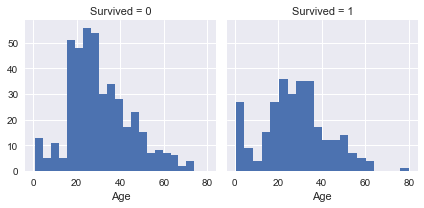

In [89]:
graph = sns.FacetGrid(train_df, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

In [90]:
#Most passengers are in 15-35 age range.
#Many passegers who were 15-25 years old did not survive.
#passengers less than 5 years of age had high chances of survival
#80year old passenger survived

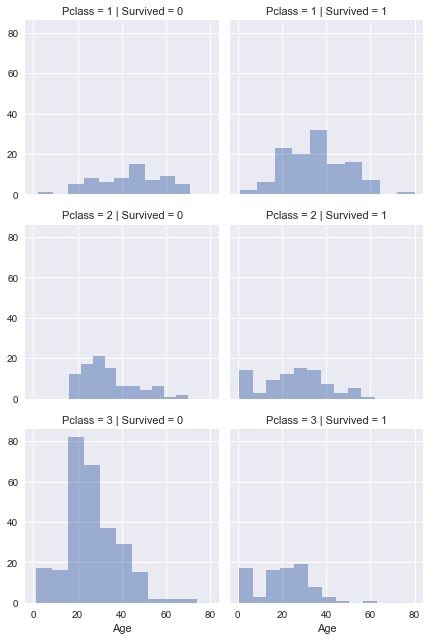

In [91]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

In [92]:
#Pclass=3 mostly did not survive and Most passengers in Pclass=1 survived. Hence we assume that upper class passengers have more chancs of survival.
#Infant passengers mostly survived  except in for Pclass =2 or 3.  we can assume that infants have more chances of survival.

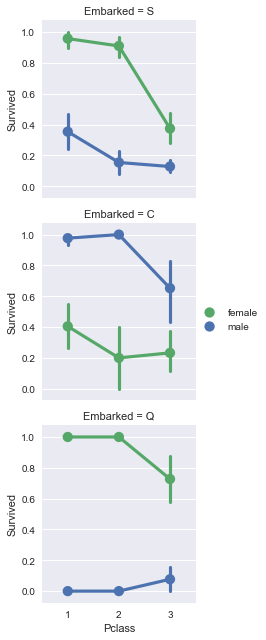

In [93]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [94]:
#as mentioned earlier females have a higher chance of survival except for Embarked=q. 
#we can assume embarked is related to pclass or cabin which is related to survival. no direct correlation


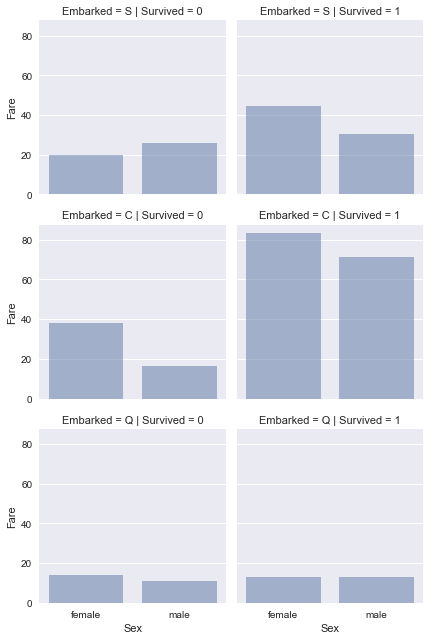

In [95]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [96]:
#Passengers who paid higher fares survived more. 
#Port of embarkation shows correlates with survival. 

In [97]:
#converting data :  Sex to Gender where female=1 and male=0.
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [98]:
#converting data :  Sibsp and parch is converted to isAlone like a flag. if person is travelling alone isAlone =0 else 1
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['SibSp'] > 1, 'IsAlone'] = 1
    dataset.loc[dataset['Parch'] > 1, 'IsAlone'] = 1

In [99]:
#completing missing data : Fill missing values for age 
#For our dataset we note corelation among Age, Gender, and Pclass. 
guess_ages = np.zeros((2,3))
print(guess_ages)
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

           
            age_guess = guess_df.median()

          
            guess_ages[i,j] = int( age_guess/0.2 + 0.2 ) * 0.2
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    
    train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
    
    
    for dataset in combine:    
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 64, 'Age']
    
    train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [100]:
train_df = train_df.drop(['Name', 'PassengerId','Embarked','Ticket','Cabin','Parch','SibSp','Fare'], axis=1)
test_df = test_df.drop(['Embarked','Ticket','Cabin','Parch','SibSp','Fare'], axis=1)
combine = [train_df,test_df]

In [101]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop(['Name', 'PassengerId'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
# Logistic Regression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, Y_train)
Y_pred = LogisticRegression.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [103]:
accuracy_log = round(LogisticRegression.score(X_train, Y_train) * 100, 2)
accuracy_log

78.680000000000007

In [104]:
# Random Forest

RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, Y_train)
Y_pred = RandomForestClassifier.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1,

In [105]:
accuracy_RandomForestClassifier = round(RandomForestClassifier.score(X_train, Y_train) * 100, 2)
accuracy_RandomForestClassifier

81.930000000000007

In [106]:
# Decision Tree

DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, Y_train)
Y_pred = DecisionTreeClassifier.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [107]:
accuracy_DecisionTreeClassifier = round(DecisionTreeClassifier.score(X_train, Y_train) * 100, 2)
accuracy_DecisionTreeClassifier

81.930000000000007

In [108]:
# Perceptron

Perceptron = Perceptron()
Perceptron.fit(X_train, Y_train)
Y_pred = Perceptron.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0,

In [109]:
accuracy_Perceptron = round(Perceptron.score(X_train, Y_train) * 100, 2)
accuracy_Perceptron

77.219999999999999

In [110]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [111]:
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_svc

80.359999999999999

In [112]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [113]:
accuracy_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
accuracy_linear_svc

78.680000000000007

In [114]:
# Stochastic Gradient Descent

SGDClassifier = SGDClassifier()
SGDClassifier.fit(X_train, Y_train)
Y_pred = SGDClassifier.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [115]:
accuracy_SGDClassifier = round(SGDClassifier.score(X_train, Y_train) * 100, 2)
accuracy_SGDClassifier 

78.680000000000007

In [116]:
KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 3)
KNeighborsClassifier.fit(X_train, Y_train)
Y_pred = KNeighborsClassifier.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [117]:
accuracy_KNeighborsClassifier = round(KNeighborsClassifier.score(X_train, Y_train) * 100, 2)
accuracy_KNeighborsClassifier

78.109999999999999

In [118]:
# Gaussian Naive Bayes

GaussianNB = GaussianNB()
GaussianNB.fit(X_train, Y_train)
Y_pred = GaussianNB.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [119]:
accuracy_GaussianNB = round(GaussianNB.score(X_train, Y_train) * 100, 2)
accuracy_GaussianNB

75.530000000000001

In [120]:
#xgboost
xgboost_prediction = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, Y_train)
Y_pred = xgboost_prediction.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [121]:
accuracy_xgboost_prediction = round(xgboost_prediction.score(X_train, Y_train) * 100, 2)
accuracy_xgboost_prediction

81.709999999999994

In [122]:
#validating models using K-Fold


def run_kfold(model):
    print("\n")
    print(str(model).split("(")[0])
    print("\n")
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = round(model.score(X_train, Y_train) * 100, 2)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [123]:
run_kfold(LogisticRegression);
run_kfold(RandomForestClassifier);
run_kfold(DecisionTreeClassifier);
run_kfold(Perceptron);
run_kfold(xgboost_prediction);
run_kfold(svc);
run_kfold(KNeighborsClassifier);
run_kfold(linear_svc);
run_kfold(GaussianNB);
run_kfold(SGDClassifier);




LogisticRegression


Fold 1 accuracy: 78.68
Fold 2 accuracy: 78.68
Fold 3 accuracy: 78.68
Fold 4 accuracy: 78.68
Fold 5 accuracy: 78.68
Fold 6 accuracy: 78.68
Fold 7 accuracy: 78.68
Fold 8 accuracy: 78.68
Fold 9 accuracy: 78.68
Fold 10 accuracy: 78.68
Mean Accuracy: 78.68000000000002


RandomForestClassifier


Fold 1 accuracy: 81.93
Fold 2 accuracy: 81.93
Fold 3 accuracy: 81.93
Fold 4 accuracy: 81.93
Fold 5 accuracy: 81.93
Fold 6 accuracy: 81.93
Fold 7 accuracy: 81.93
Fold 8 accuracy: 81.82
Fold 9 accuracy: 81.93
Fold 10 accuracy: 81.93
Mean Accuracy: 81.91900000000001


DecisionTreeClassifier


Fold 1 accuracy: 81.93
Fold 2 accuracy: 81.93
Fold 3 accuracy: 81.93
Fold 4 accuracy: 81.93
Fold 5 accuracy: 81.93
Fold 6 accuracy: 81.93
Fold 7 accuracy: 81.93
Fold 8 accuracy: 81.93
Fold 9 accuracy: 81.93
Fold 10 accuracy: 81.93
Mean Accuracy: 81.93000000000002


Perceptron


Fold 1 accuracy: 77.22
Fold 2 accuracy: 77.22
Fold 3 accuracy: 77.22
Fold 4 accuracy: 77.22
Fold 5 accuracy: 77.22
F

In [124]:
#DecisionTreeClassifier and RandomForestClassifier have highest accuracy i.e 81.93000000000002. I will use RandomForestClassifier to make my submission.
Y_pred = RandomForestClassifier.predict(X_test)
Y_pred
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [60]:
#deep learning 
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

In [61]:

classifier = Sequential()
# Using relu for hidden layers and sigmoid for output layer 
# Adding the input and first hidden layer
#units = (4 +1) /2
classifier.add(Dense(units = 3 , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu' , input_dim =4))

# Adding 2 hidden layers
classifier.add(Dense(units = 3 , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu'))
classifier.add(Dense(units = 3 , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='relu'))
#classifier.add(LSTM(100))
# Adding the output layer
classifier.add(Dense(units = 1 , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='sigmoid'))


classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=10)
#classifier.fit(X_train, Y_train, batch_size = 10, epochs = 1)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 999us/step - loss: 0.6954 - acc: 0.5576 - val_loss: 0.6891 - val_acc: 0.6145
Epoch 2/100
712/712 [==============================] - 0s 224us/step - loss: 0.6856 - acc: 0.6166 - val_loss: 0.6801 - val_acc: 0.6145
Epoch 3/100
712/712 [==============================] - 0s 219us/step - loss: 0.6755 - acc: 0.6166 - val_loss: 0.6693 - val_acc: 0.6145
Epoch 4/100
712/712 [==============================] - 0s 232us/step - loss: 0.6639 - acc: 0.6166 - val_loss: 0.6578 - val_acc: 0.6145
Epoch 5/100
712/712 [==============================] - 0s 236us/step - loss: 0.6514 - acc: 0.6166 - val_loss: 0.6446 - val_acc: 0.6145
Epoch 6/100
712/712 [==============================] - 0s 234us/step - loss: 0.6371 - acc: 0.6166 - val_loss: 0.6288 - val_acc: 0.6145
Epoch 7/100
712/712 [==============================] - 0s 203us/step - loss: 0.6177 - acc: 0.6348 - val_loss: 0.6047 - val_acc: 0.7430
Epoch 8/1

Epoch 61/100
712/712 [==============================] - 0s 238us/step - loss: 0.4555 - acc: 0.8062 - val_loss: 0.4232 - val_acc: 0.7933
Epoch 62/100
712/712 [==============================] - 0s 234us/step - loss: 0.4548 - acc: 0.8062 - val_loss: 0.4224 - val_acc: 0.7933
Epoch 63/100
712/712 [==============================] - 0s 240us/step - loss: 0.4549 - acc: 0.8062 - val_loss: 0.4218 - val_acc: 0.7933
Epoch 64/100
712/712 [==============================] - 0s 211us/step - loss: 0.4544 - acc: 0.8062 - val_loss: 0.4217 - val_acc: 0.7933
Epoch 65/100
712/712 [==============================] - 0s 203us/step - loss: 0.4551 - acc: 0.8062 - val_loss: 0.4205 - val_acc: 0.7933
Epoch 66/100
712/712 [==============================] - 0s 230us/step - loss: 0.4538 - acc: 0.8062 - val_loss: 0.4198 - val_acc: 0.7933
Epoch 67/100
712/712 [==============================] - 0s 240us/step - loss: 0.4537 - acc: 0.8062 - val_loss: 0.4187 - val_acc: 0.7933
Epoch 68/100
712/712 [==========================

In [64]:
Y_pred = classifier.predict(X_test) 
# We need to change y_pred from probabilities to boolean values in order for the confusion matrix to work
Y_pred = (Y_pred > 0.5) #Will return True if y_pred>0.5(threshold is 50%) and false if less


In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

print (cm)

[[97 13]
 [25 44]]
